This notebook introduces the basic concepts of RFM (Recency, Frequency, Monetary) analysis using an e-commerce dataset. We'll learn how to prepare data for RFM analysis.

### Import Libraries

In [2]:
# Import the necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set some display options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [99]:
url = "https://raw.githubusercontent.com/iamctodd/datasets/refs/heads/main/ecommerce_dataset_updated.csv"
df = pd.read_csv(url)
df.head(3)

,User_ID,Product_ID,Category,Price,Discount(%),Final_Price,Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12/11/24
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,9/2/24
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,1/9/24


In [5]:
# Explore the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         3732 non-null   object 
 1   Product_ID      3732 non-null   object 
 2   Category        3732 non-null   object 
 3   Price           3732 non-null   float64
 4   Discount(%)     3732 non-null   int64  
 5   Final_Price     3732 non-null   float64
 6   Payment_Method  3732 non-null   object 
 7   Purchase_Date   3732 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 233.4+ KB


In [6]:
# Summary stats
df.describe()

,Price,Discount(%),Final_Price
count,3732.000000,3732.000000,3732.000000
mean,255.296064,18.650054,207.782288
std,141.231295,14.665090,122.498844
min,10.090000,0.000000,5.890000
25%,135.572500,5.000000,105.505000
50%,255.430000,15.000000,200.265000
75%,377.015000,25.000000,304.262500
max,499.960000,50.000000,496.820000


In [7]:
# Check for missing values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Category,0
Price,0
Discount(%),0
Final_Price,0
Payment_Method,0
Purchase_Date,0


In [8]:
# Check unique values in categorical columns
df.select_dtypes(include=['object']).nunique() #this will select all d(ata)types that are objects

,0
User_ID,3425
Product_ID,3660
Category,8
Payment_Method,6
Purchase_Date,373


# 3: PREP DATA FOR RFM ANALYSIS

RFM stands for Recency, Frequency, Monetary value

- **Recency**: How recently did the customer make a purchase?
- **Frequency**: How often does the customer make purchases?
- **Monetary**: How much does the customer spend?

In [11]:
# TODO: Convert the Purchase_Date column to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='mixed') #pandas has a to_datetime function. you can also format

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User_ID         3732 non-null   object        
 1   Product_ID      3732 non-null   object        
 2   Category        3732 non-null   object        
 3   Price           3732 non-null   float64       
 4   Discount(%)     3732 non-null   int64         
 5   Final_Price     3732 non-null   float64       
 6   Payment_Method  3732 non-null   object        
 7   Purchase_Date   3732 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 233.4+ KB


In [13]:
df.head(3)

,User_ID,Product_ID,Category,Price,Discount(%),Final_Price,Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-12-11
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-09-02
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-01-09


In [10]:
# TODO: Find the most recent date in the dataset
df['Purchase_Date'].max()

Timestamp('2024-12-11 00:00:00')

# 4: CALCULATE RFM METRICS

In [15]:
# TODO: Calculate RFM metrics
rfm = df.groupby('User_ID').agg({ #Lambda is a quick little function that will never be used again
  #    'Purchase_Date': lambda x: (df['Purchase_Date'].max() - x.max()).days, #days #Recency
    'Product_ID': 'count', # frequency
    'Final_Price': 'sum' # Monetary
}).rename(columns={
    'Purchase_Date': 'Recency',
    'Product_ID': 'Frequency',
    'Final_Price': 'Monetary'
})

In [17]:
rfm.head()

,Recency,Frequency,Monetary
User_ID,,,
001ae40d,201,1,345.93
00209791,212,1,10.32
0021e458,327,1,123.51
00390cf5,65,1,96.32
0041710c,199,1,388.45


In [18]:
#calculate recency
latest_purchase = df.groupby('User_ID')['Purchase_Date'].max()
latest_purchase

,Purchase_Date
User_ID,
001ae40d,2024-05-24
00209791,2024-05-13
0021e458,2024-01-19
00390cf5,2024-10-07
0041710c,2024-05-26
...,...
ffb59cb8,2024-02-14
ffcf6748,2024-04-17
ffda329b,2024-01-05


In [20]:
rfm['Recency'] = (df['Purchase_Date'].max() - latest_purchase).dt.days
rfm.head()

,Recency,Frequency,Monetary
User_ID,,,
001ae40d,201,1,345.93
00209791,212,1,10.32
0021e458,327,1,123.51
00390cf5,65,1,96.32
0041710c,199,1,388.45


# 5: VISUALIZATION OF RFM METRICS

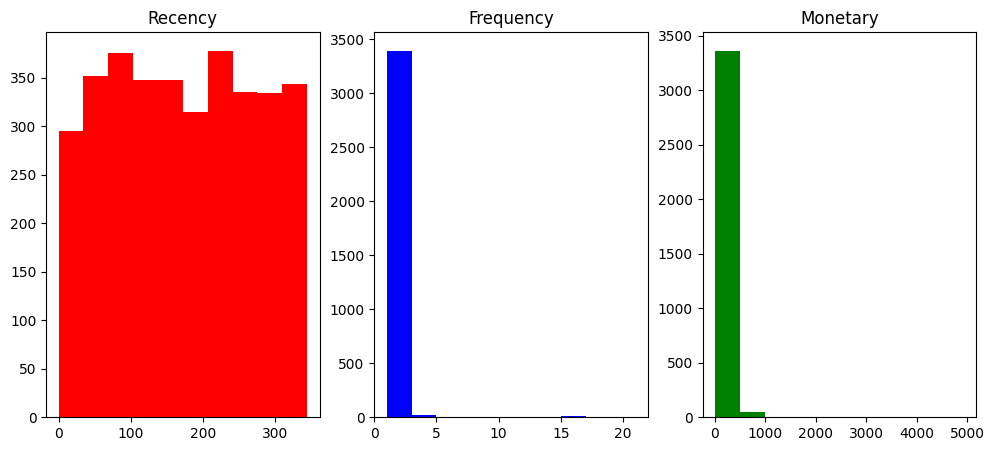

In [22]:
# TODO: Create histograms for Recency, Frequency, and Monetary metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], color="red")
plt.title("Recency")

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], color="blue")
plt.title("Frequency")

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], color="green")
plt.title("Monetary")

plt.show()


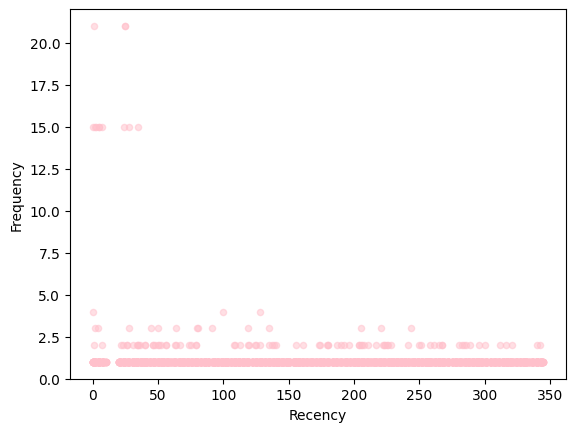

In [34]:
# Look at the relationships between RFM metrics

# Recency vs. Frequency
rfm.plot(kind='scatter', x='Recency', y='Frequency', alpha=0.5, color="pink")
plt.show()

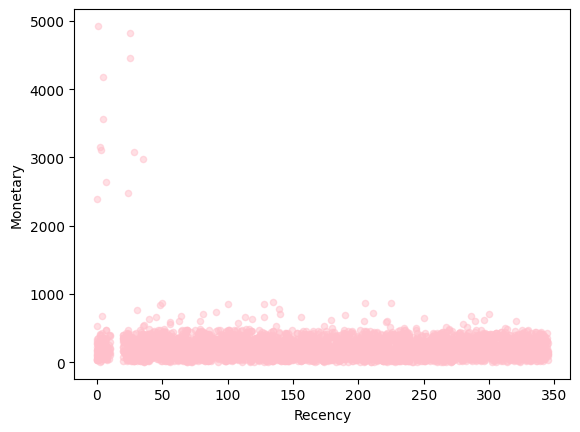

In [33]:
# Recency vs. Monetary
rfm.plot(kind='scatter', x='Recency', y='Monetary', alpha=0.5, color="pink")
plt.show()

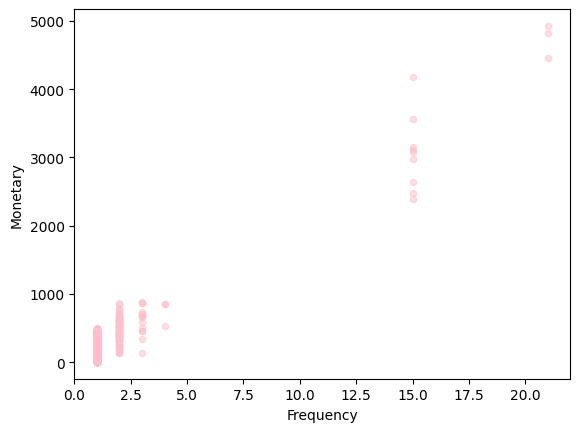

In [32]:
# Frequency vs. Monetary
rfm.plot(kind='scatter', x='Frequency', y='Monetary', alpha=0.5, color="pink")
plt.show()

# 6: INSIGHTS

In [35]:
# What is average purchase value by payment method?
df.groupby('Payment_Method')['Final_Price'].mean() #group by the object dtype and find the mean/median of the numerical after

,Final_Price
Payment_Method,
Cash on Delivery,210.275692
Credit Card,206.248667
Debit Card,212.046430
Net Banking,205.279222
PayPal,184.226667
UPI,205.533351


In [37]:
# What is average purchase value by category?
df.groupby('Category')['Final_Price'].mean()

,Final_Price
Category,
Beauty,207.265717
Books,209.500221
Clothing,217.674510
Electronics,202.475734
Grocery,152.990000
Home & Kitchen,202.594436
Sports,209.446383
Toys,205.977958


#7: RFM SCORING


For each metric, we'll create quartiles (1-4):

1 = best, 4 = worst for Recency (lower is better)

1 = worst, 4 = best for Frequency and Monetary (higher is better)


In [45]:
# Quartiles for Recency (1 is most recent, 4 is least recent)
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
#rfm.head()

In [46]:
# Quartiles for Frequency (4 is most frequent, 1 is least frequent)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
#rfm.head()

In [47]:
# Quartiles for Monetary (4 is highest value, 1 is lowest value)
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
#rfm.head()

In [48]:
# Convert scores to integers for calculations
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# 7: CREATE RFM SEGMENTS

combine the individual R, F, and M scores into a single RFM segment

In [49]:
# Create RFM segment by concatenating R, F, and M scores
rfm['Segment'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

In [65]:
# Create a single numeric RFM score (weighted average)
rfm['RFM_Score'] = (0.33*rfm['R_Score'] + 0.33*rfm['F_Score'] + 0.34*rfm['M_Score'])/3

In [66]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,M_Score,F_Score,Segment,RFM_Score,Customer Segment
User_ID,,,,,,,,,
001ae40d,201,1,345.93,3,4,1,8,0.893333,Potential Loyalists
00209791,212,1,10.32,3,1,1,5,0.553333,New Customers
0021e458,327,1,123.51,4,2,1,7,0.776667,Potential Loyalists
00390cf5,65,1,96.32,1,1,1,3,0.333333,New Customers
0041710c,199,1,388.45,3,4,1,8,0.893333,Potential Loyalists


#8: SEGMENT ANALYSIS & DEFINITION

create meaningful customer segments based on RFM scores

In [81]:
# Write a function to define customer segments based on RFM score
def rfm_segment(df):
    if df['RFM_Score'] >= 1:
        return 'Champions'
    elif (df['RFM_Score'] >= 0.8) and (df['RFM_Score'] < 1):
        return 'Loyal Customers'
    elif (df['RFM_Score'] >= 0.6) and (df['RFM_Score'] < 0.8):
        return 'Potential Loyalists'
    elif (df['RFM_Score'] >= 0.4) and (df['RFM_Score'] < 0.6):
        return 'Promisin'
    elif (df['RFM_Score'] >= 0.2) and (df['RFM_Score'] < 0.4):
        return 'Recent Customers'
    else:
        return 'Lost Customers'

In [82]:
# Calculate average RFM values for each segment
rfm['Customer Segment'] = rfm.apply(rfm_segment, axis=1)

In [83]:
rfm.describe()

,Recency,Frequency,Monetary,R_Score,M_Score,F_Score,Segment,RFM_Score
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,173.025109,1.089635,226.406861,2.499562,2.499562,2.499562,7.498686,0.833187
std,98.426971,0.952046,240.508864,1.118328,1.118328,1.118328,1.945988,0.216278
min,0.000000,1.000000,5.890000,1.000000,1.000000,1.000000,3.000000,0.333333
25%,88.000000,1.000000,106.140000,1.000000,1.000000,1.000000,6.000000,0.666667
50%,172.000000,1.000000,204.870000,2.000000,2.000000,2.000000,7.000000,0.783333
75%,257.000000,1.000000,314.460000,3.000000,3.000000,3.000000,9.000000,1.000000
max,345.000000,21.000000,4926.570000,4.000000,4.000000,4.000000,12.000000,1.333333


In [84]:
#count the number of customers in each segment
rfm['Customer Segment'].value_counts()

,count
Customer Segment,
Potential Loyalists,1199
Champions,926
Loyal Customers,776
Promisin,468
Recent Customers,56


In [91]:
avg_rfm = rfm.groupby('Customer Segment').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean'
})

In [98]:
avg_rfm.head()

,R_Score,F_Score,M_Score
Customer Segment,,,
Champions,3.104752,3.217063,3.552916
Loyal Customers,2.921392,2.824742,2.460052
Potential Loyalists,2.195163,2.175146,2.154295
Promisin,1.561966,1.551282,1.544872
Recent Customers,1.000000,1.000000,1.000000


#9: SEGMENT VISUALIZATION

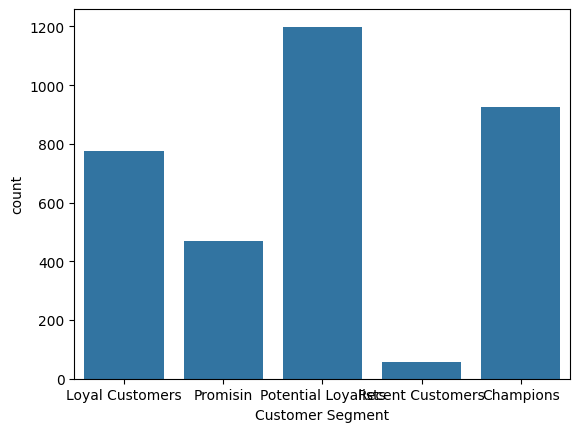

In [97]:
# Bar chart showing count of customers in each segment
sns.countplot(x='Customer Segment', data=rfm)
plt.show()